# [Chapter 2](https://github.com/Ziaeemehr/netsci/blob/main/docs/examples/chap_02.ipynb)

#### **Graph Theory**

Code by : Abolfazl Ziaeemehr 
- https://github.com/Ziaeemehr

<a href="https://colab.research.google.com/github/Ziaeemehr/netsci/blob/main/docs/examples/chap_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# uncomment and run this line to install the package on colab
# !pip install "git+https://github.com/Ziaeemehr/netsci.git" -q

In [1]:
import netsci
import numpy as np
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt
from netsci.plot import plot_graph
from netsci.analysis import find_sap, find_hamiltonian_path

In [2]:
np.random.seed(0)

Degrees: {0: 2, 1: 2, 2: 2, 3: 5, 4: 3, 5: 1, 6: 3, 7: 2}
Average degree: 2.5
Adjacency matrix:
 [[0 0 0 1 1 0 0 0]
 [0 0 1 0 0 0 1 0]
 [0 1 0 1 0 0 0 0]
 [1 0 1 0 0 1 1 1]
 [1 0 0 0 0 0 1 1]
 [0 0 0 1 0 0 0 0]
 [0 1 0 1 1 0 0 0]
 [0 0 0 1 1 0 0 0]]
Edges: [(0, 3), (0, 4), (1, 2), (1, 6), (2, 3), (3, 5), (3, 6), (3, 7), (4, 6), (4, 7)]


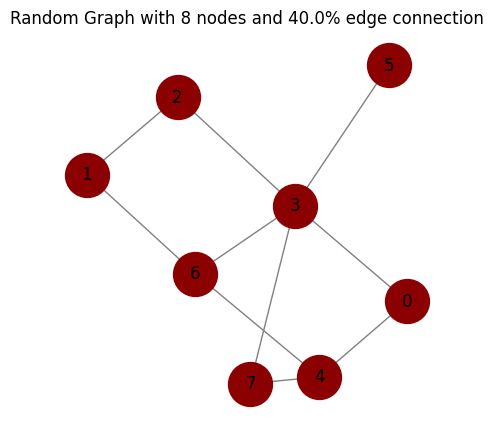

In [3]:
# make a random graph with n nodes and p% probability of edge connection
num_nodes = 8
probability = .4
seed = 2
graph = nx.gnp_random_graph(num_nodes, probability, seed=2, directed=False)

# degree distribution
degrees = dict(graph.degree())
print("Degrees:", degrees)

# calculate the average degree
average_degree = np.mean(list(degrees.values()))
print("Average degree:", average_degree)

# adjacency matrix
adjacency_matrix = nx.to_numpy_array(graph).astype(int)
print("Adjacency matrix:\n", adjacency_matrix)

# edges
edges = list(graph.edges())
print("Edges:", edges)

# plot the graph
plot_graph(graph, node_size=1000,
           node_color='darkred',
           edge_color='gray',
           figsize=(5, 5),
           title="Random Graph with {} nodes and {}% edge connection".format(num_nodes, probability*100))
plt.show()


In [4]:
# shortest path, find distance between two nodes
source = np.random.randint(0, len(graph)) # random source node
target = np.random.randint(0, len(graph)) # random target node
shortest_path = nx.shortest_path(graph, source, target)
print("Shortest path from", source, "to", target, ":", shortest_path)

# diameter : maximal shortest path length
if nx.is_connected(graph):
    diameter = nx.diameter(graph)
    print("Diameter:", diameter)
    
# average shortest path length
avg_shortest_path_length = nx.average_shortest_path_length(graph)
print(f"Average shortest path length: {avg_shortest_path_length:.2f}")

Shortest path from 3 to 0 : [3, 0]
Diameter: 3
Average shortest path length: 1.82


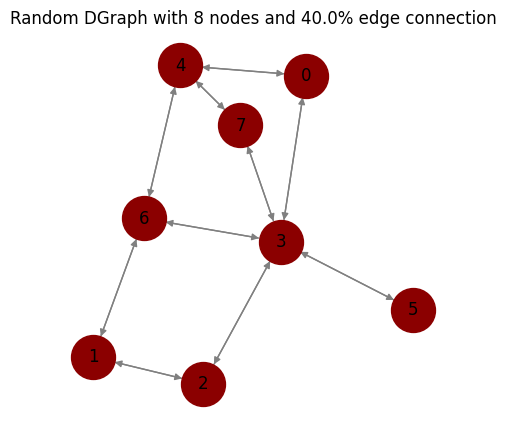

In [5]:
# directed graph
graph_dir = nx.to_directed(graph)
plot_graph(graph_dir, 
           node_size=1000,
           node_color='darkred',
           edge_color='gray',
           figsize=(5, 5),
           seed=1,
           title="Random DGraph with {} nodes and {}% edge connection".format(num_nodes, probability*100));

Weighted adjacency matrix:
 [[0 9 4 9 9]
 [9 0 1 6 4]
 [4 1 0 0 6]
 [9 6 0 0 8]
 [9 4 6 8 0]]


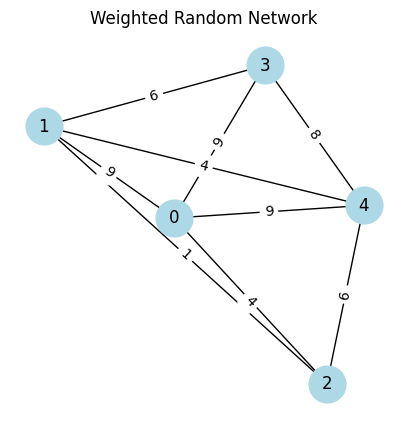

In [6]:
# weighted graph
seed = 3
np.random.seed(seed) # to fix the plot

num_nodes = 5
probability = 0.8
graph_w = nx.erdos_renyi_graph(num_nodes, probability, seed=seed)

for (u,v) in graph_w.edges():
    graph_w[u][v]['weight'] = np.random.randint(1, 10)

# plot the weighted graph
edge_labels = nx.get_edge_attributes(graph_w, 'weight')

plot_graph(graph_w, 
           with_labels=True, 
           node_color='lightblue', 
           node_size=700, 
           font_size=12,
           edge_labels=edge_labels, 
           figsize=(5, 5), 
           title="Weighted Random Network")

weighted_adjacency_matrix = nx.to_numpy_array(graph_w, weight='weight').astype(int)
print("Weighted adjacency matrix:\n", weighted_adjacency_matrix)

self avoiding path

A->B->E->F
A->C->F


<Axes: >

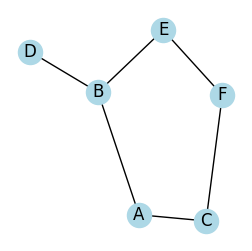

In [7]:
# Create a graph
G = nx.Graph()
edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('E', 'F')]
G.add_edges_from(edges)

# Find all self-avoiding paths from 'A' to 'F'
start_node = 'A'
target_node = 'F'
all_saps = list(find_sap(G, start_node, target_node))

for path in all_saps:
    print("->".join(path))

plot_graph(G, seed=2, figsize=(3, 3))


A Hamiltonian path is a path in a graph that visits each vertex exactly once.

Hamiltonian Path found: (1, 2, 3, 4, 5, 6)


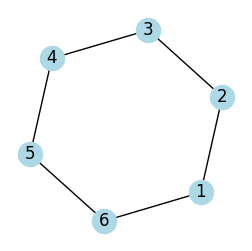

In [8]:
# Example usage
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1)])

plot_graph(G, seed=2, figsize=(3, 3))

path = find_hamiltonian_path(G)
if path:
    print("Hamiltonian Path found:", path)
else:
    print("No Hamiltonian Path found")


In [9]:
# hamiltonian path of weighted graph:
path = find_hamiltonian_path(graph_w)
if path:
    print("Hamiltonian Path found:", path)
else:
    print("No Hamiltonian Path found")

Hamiltonian Path found: (0, 1, 2, 4, 3)


- Adjacency List

adjacency matrix
 [[0 1 1 0 0 0]
 [1 0 0 1 1 0]
 [1 0 0 0 0 1]
 [0 1 0 0 0 0]
 [0 1 0 0 0 1]
 [0 0 1 0 1 0]]
adjacency list
 {1: [2, 3], 2: [1, 4, 5], 3: [1, 6], 4: [2], 5: [2, 6], 6: [3, 5]}


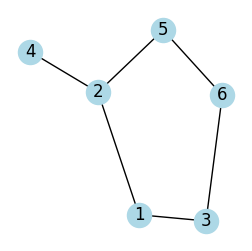

In [10]:
G = nx.Graph()
edges = [(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (5, 6)]
G.add_edges_from(edges)

plot_graph(G, seed=2, figsize=(3, 3))

adjacency_matrix = nx.to_numpy_array(G).astype(int)
print(f"adjacency matrix\n {adjacency_matrix}")


adjacency_list = {n: list(neighbors) for n, neighbors in G.adj.items()}
print(f"adjacency list\n {adjacency_list}")

- Adjaceccy list of directed graph:

adjacency matrix
 [[0 1 1 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]]
adjacency list
 {1: [2, 3], 2: [4, 5], 3: [6], 4: [], 5: [6], 6: []}


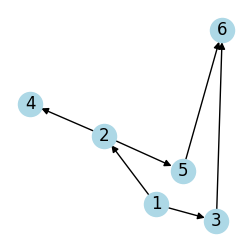

In [11]:
G = nx.DiGraph()
edges = [(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (5, 6)]
G.add_edges_from(edges)
plot_graph(G, seed=2, figsize=(3, 3))

adjacency_matrix = nx.to_numpy_array(G).astype(int)
print(f"adjacency matrix\n {adjacency_matrix}")

adjacency_list = {n: list(neighbors) for n, neighbors in G.adj.items()}
print(f"adjacency list\n {adjacency_list}")

[Implementation of BFS for Graph using Adjacency List:](https://www.geeksforgeeks.org/breadth-first-search-or-bfs-for-a-graph/)

Breadth First Traversal starting from vertex 0: 0 1 2 3 4 

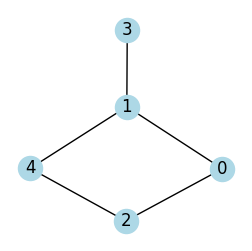

In [12]:
from collections import deque

# Function to perform Breadth First Search on a graph
# represented using adjacency list
def bfs(adjList, startNode, visited):
    # Create a queue for BFS
    q = deque()

    # Mark the current node as visited and enqueue it
    visited[startNode] = True
    q.append(startNode)

    # Iterate over the queue
    while q:
        # Dequeue a vertex from queue and print it
        currentNode = q.popleft()
        print(currentNode, end=" ")

        # Get all adjacent vertices of the dequeued vertex
        # If an adjacent has not been visited, then mark it visited and enqueue it
        for neighbor in adjList[currentNode]:
            if not visited[neighbor]:
                visited[neighbor] = True
                q.append(neighbor)

# Function to add an edge to the graph
def addEdge(adjList, u, v):
    adjList[u].append(v)

def main():
    # Number of vertices in the graph
    vertices = 5

    # Adjacency list representation of the graph
    adjList = [[] for _ in range(vertices)]

    # Add edges to the graph
    addEdge(adjList, 0, 1)
    addEdge(adjList, 0, 2)
    addEdge(adjList, 1, 3)
    addEdge(adjList, 1, 4)
    addEdge(adjList, 2, 4)

    # Mark all the vertices as not visited
    visited = [False] * vertices

    # Perform BFS traversal starting from vertex 0
    print("Breadth First Traversal starting from vertex 0:", end=" ")
    bfs(adjList, 0, visited)
    
    #plot the graph
    G = nx.Graph()
    G.add_edges_from([(0, 1), (0, 2), (1, 3), (1, 4), (2, 4)])
    plot_graph(G, seed=2, figsize=(3, 3))

if __name__ == "__main__":
    main()


In [13]:
from netsci.analysis import graph_info
graph_info(graph_w)

Graph information
Directed                                :                False
Number of nodes                         :                    5
Number of edges                         :                    9
Average degree                          :               3.6000
Connectivity                            :            connected


### Table 2.1

In [14]:
import networkx as nx
import pandas as pd
from netsci.analysis import average_degree
from netsci.utils import list_sample_graphs, load_sample_graph

In [17]:
# nets = list(list_sample_graphs().keys())
nets = [
    'Collaboration',
    'Internet',
    'PowerGrid',
    'Protein',
    'PhoneCalls',
    'Citation',
    'Metabolic',
    'Email',
    'WWW',
    'Actor'
]

#### run the following only on colab

In [ ]:

from google.colab import drive
import os

# URL of the zip file to be downloaded
url = "https://networksciencebook.com/translations/en/resources/networks.zip"
# Mount Google Drive
drive.mount('/content/drive')
# Create the 'network_science' directory in MyDrive if it doesn't exist
network_science_dir = '/content/drive/MyDrive/network_science'
os.makedirs(network_science_dir, exist_ok=True)
# Change directory to 'network_science'
os.chdir(network_science_dir)
# Download the zip file to the 'network_science' directory
!wget $url -O networks.zip
# Unzip the downloaded file in the 'network_science' directory
!unzip networks.zip

json_file = "https://raw.githubusercontent.com/Ziaeemehr/netsci/main/netsci/datasets/sample_graphs.json"
# download json file
!wget $json_file -O sample_graphs.json



In [20]:
# on colab:
# G = load_sample_graph("Internet", colab_path=network_science_dir)

# on local:
G = load_sample_graph("Internet")

In [21]:
graph_info(G)

Graph information
Directed                                :                False
Number of nodes                         :               192244
Number of edges                         :               609066
Average degree                          :               6.3364
Connectivity                            :         disconnected


In [19]:
for net in tqdm(nets, desc="Processing sample graphs"):
    print(net)

Processing sample graphs: 100%|██████████| 10/10 [00:00<00:00, 19463.13it/s]

Collaboration
Internet
PowerGrid
Protein
PhoneCalls
Citation
Metabolic
Email
WWW
Actor


In [20]:
data_list = []

for net in tqdm(nets[:-1], desc="Processing sample graphs"):
    G = load_sample_graph(net)
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    avg_degree = average_degree(G)
    directed = nx.is_directed(G)
    
    # Append a dictionary of data for this network to the list
    data_list.append({
        'num_nodes': num_nodes,
        'num_edges': num_edges,
        'avg_degree': avg_degree,
        "directed": directed,
        "name": net
    })

# Create the DataFrame from the list of dictionaries
df = pd.DataFrame(data_list)

# Display the DataFrame
df

Processing sample graphs: 100%|██████████| 9/9 [00:33<00:00,  3.72s/it]


,num_nodes,num_edges,avg_degree,directed,name
0,23133,93439,8.078416,False,Collaboration
1,192244,609066,6.336385,False,Internet
2,4941,6594,2.669095,False,PowerGrid
3,2018,2930,2.903865,False,Protein
4,36595,91826,5.018500,True,PhoneCalls
5,449673,4689479,20.857285,True,Citation
6,1039,5802,11.168431,True,Metabolic
7,57194,103731,3.627339,True,Email
8,325729,1497134,9.192513,True,WWW
